### Business Objective:

Generate the features from the dataset and use them to recommend the books accordingly to the users.

#### Content
The Book-Crossing dataset comprises 3 files.


•	Users
Contains the users. Note that user IDs (User-ID) have been anonymized and map to integers. Demographic data is provided (Location, Age) if available. Otherwise, these fields contain NULL-values.

•	Books
Books are identified by their respective ISBN. Invalid ISBNs have already been removed from the dataset. Moreover, some content-based information is given (Book-Title, Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web Services. Note that in case of several authors, only the first is provided. URLs linking to cover images are also given, appearing in three different flavours (Image-URL-S, Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the Amazon web site.

•	Ratings
Contains the book rating information. Ratings (Book-Rating) are either explicit, expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit, expressed by 0.


### ###   Table of Contents
*business understaning

*Libraries 

*Dataset

*Data understanding and data cleaning

*Data Exploration


### A Book Recommendation System which recommends the users a selection of books based on their interests.

###  import Necessary Libraries

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from wordcloud import wordcloud,STOPWORDS
import string
import re

%matplotlib inline

import warnings

warnings.filterwarnings('ignore')


### import data

In [2]:
books=pd.read_csv("Books.csv")
users=pd.read_csv("Users.csv")
ratings=pd.read_csv("Ratings.csv")

### Data understanding

In [3]:
books.head(2)


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...


In [4]:
users.head(2)


,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0


In [5]:
ratings.head(2)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5


In [6]:
print("BOOKS_DATA:",books.shape)
print("USERS_DATA:",users.shape)
print("RATINGS_DATA:",ratings.shape)

BOOKS_DATA: (271360, 8)
USERS_DATA: (278858, 3)
RATINGS_DATA: (1149780, 3)


In [7]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [8]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [9]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [10]:
books.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [11]:
users.isna().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [12]:
ratings.isna().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

###  DATA CLEANING  & DATA EXPLORATION

#### 1.BOOKS_DATA

In [13]:
books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

### We will drop the columns that primarily don't seem important for the book recommendation.

In [14]:
books.drop(columns=['Image-URL-S','Image-URL-M','Image-URL-L'],axis=1,inplace = True)

In [15]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
dtypes: object(5)
memory usage: 10.4+ MB


In [16]:
books.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
dtype: int64

In [17]:
# Renamimng the columns

dict={'Book-Title':'booktiltle','Book-Author':'bookauthor','Year-Of-Publication':'yearofpublication','Publisher':'publisher'}
books.rename(columns=dict,inplace=True)

In [18]:
books.dropna(inplace=True)

In [19]:
books['yearofpublication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [20]:
# fxing the error's year of publication column


books.loc[(books['yearofpublication']=='DK Publishing Inc') | (books['yearofpublication']=='Gallimard')]



,ISBN,booktiltle,bookauthor,yearofpublication,publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...


In [21]:
#dropping the rows with errors as they are very few in number
books.drop(books[books['yearofpublication']=='DK Publishing Inc'].index,inplace=True)
books.drop(books[books['yearofpublication']=='Gallimard'].index,inplace=True)

In [23]:
#changing the publication year to int type before feeding it to the models
books['yearofpublication'] = books['yearofpublication'].astype('int')

In [25]:
print(sorted(books['yearofpublication'].unique()))

[0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050]


### we are having some publications years as 0 ideally we were not supposed to have  years like these. we are not going to drop here as we may loose some valid information. so, replace these years by mean of same column

In [48]:
#replacing the yearofpublication with 0 input with nan values

books.loc[(books['yearofpublication']==0)]=np.nan
#replacing the nan values in the publication year with mean of the same column

books['yearofpublication'].fillna((books['yearofpublication'].mean()), inplace=True)



In [49]:
#converting to integer type
books['yearofpublication'] = books['yearofpublication'].astype('int') 

In [50]:
books['yearofpublication'].value_counts()[0:10]

2002    17626
1999    17431
2001    17358
2000    17232
1998    15766
1993    15220
1997    14890
2003    14358
1996    14030
1995    13545
Name: yearofpublication, dtype: int64

In [51]:
books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271354 entries, 0 to 271359
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   ISBN               266736 non-null  object
 1   booktiltle         266736 non-null  object
 2   bookauthor         266736 non-null  object
 3   yearofpublication  271354 non-null  int32 
 4   publisher          266736 non-null  object
dtypes: int32(1), object(4)
memory usage: 11.4+ MB


In [53]:
books.head(4)

,ISBN,booktiltle,bookauthor,yearofpublication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux


In [54]:
## Uppercasing all alphabets in ISBN
books['ISBN'] = books['ISBN'].str.upper()

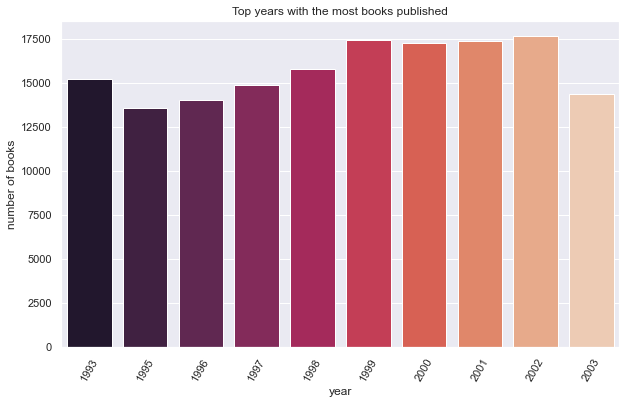

In [55]:
plt.subplots(figsize=(10,6))
sns.set_theme(style="darkgrid",context = 'notebook')
sns.barplot(x = books['yearofpublication'].value_counts()[:10].index,y = books['yearofpublication'].value_counts()[:10].values,
            palette = 'rocket').set(title = 'Top years with the most books published',xlabel = 'year',ylabel = 'number of books')
plt.xticks(rotation = 60)
plt.show()

### Year 2000 has seen the most number of books being published around 17500 books. The ten year period stretching from 1993 to 2003 has seen a good number of book publications.

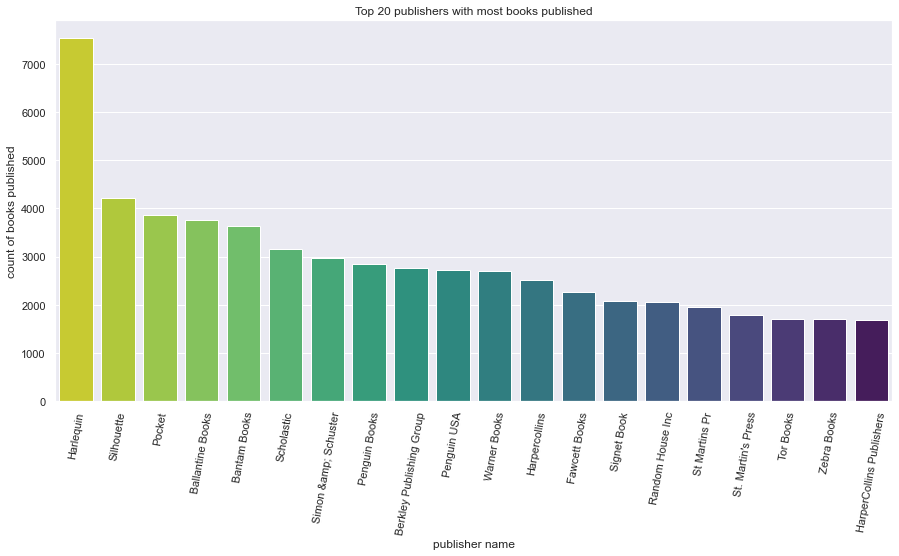

In [56]:
plt.subplots(figsize=(15,7))
sns.set_theme(style="darkgrid",context = 'notebook')
sns.barplot(x = books['publisher'].value_counts()[:20].index,y = books['publisher'].value_counts()[:20].values,
            palette = 'viridis_r').set(title = 'Top 20 publishers with most books published',xlabel = 'publisher name',ylabel = 'count of books published')
plt.xticks(rotation = 80)
plt.show()

#### Harlequin can be seen as the publication house that has published the most number of books almost close to 7600 books, followed by Silhouette then Pocket and others in the sequence.

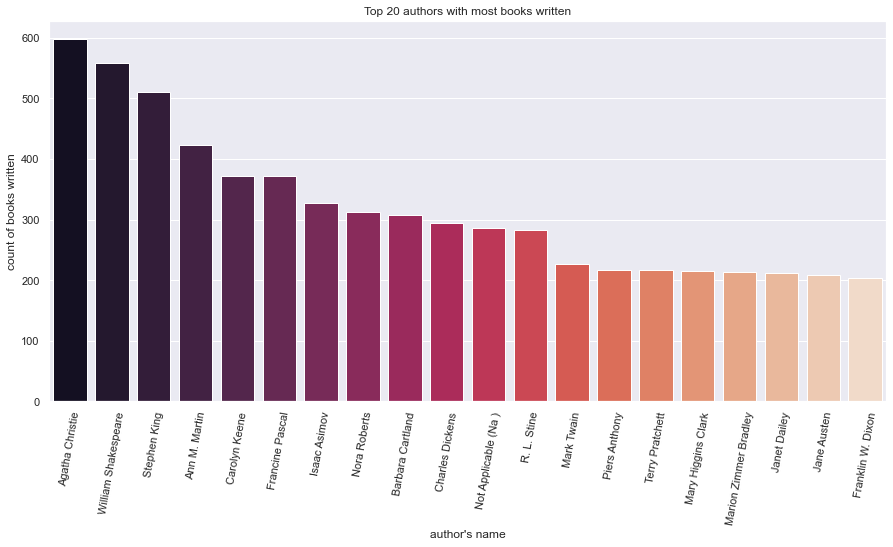

In [58]:
plt.subplots(figsize=(15,7))
sns.set_theme(style="darkgrid",context = 'notebook')
sns.barplot(x = books['bookauthor'].value_counts()[:20].index,y = books['bookauthor'].value_counts()[:20].values,
            palette = 'rocket').set(title = 'Top 20 authors with most books written',xlabel = "author's name",ylabel = 'count of books written')
plt.xticks(rotation = 80)
plt.show()

### Agatha Christie has authored the most books in our dataset with 600 books. William Shakespeare, Stephen Hawking and Ann M. Martin are also some of the authors who have written 400 - 500 books

### USERSDATA

In [59]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [60]:
dict = {'User-ID': 'userID',
        'Age':'age'}

users.rename(columns=dict,inplace=True)

In [62]:
users.head(1)

,userID,Location,age
0,1,"nyc, new york, usa",NaN


In [63]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   userID    278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [65]:
users.isna().sum()

userID           0
Location         0
age         110762
dtype: int64

In [64]:
print(sorted(users['age'].unique()))

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

#### As can we see from the values t people who are 0 years old and also we have people who are 244 years old which is for sure an error so we will keep the age group only from 5 years old to 85 years old and for the rest we will replace them with mean of the age.

In [67]:
#replacing the less than 5 and more than 85 values with mean of the age   
users.loc[(users['age'] < 5) | (users['age'] > 85),'age'] = np.nan
users['age'].fillna((users['age'].mean()), inplace=True)

print(sorted(users['age'].unique()))

[5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 34.71685995610511, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0]


In [69]:
#converting the age to integer type 
users['age'] = users['age'].astype('int')
users['age']

0         34
1         18
2         34
3         17
4         34
          ..
278853    34
278854    50
278855    34
278856    34
278857    34
Name: age, Length: 278858, dtype: int32

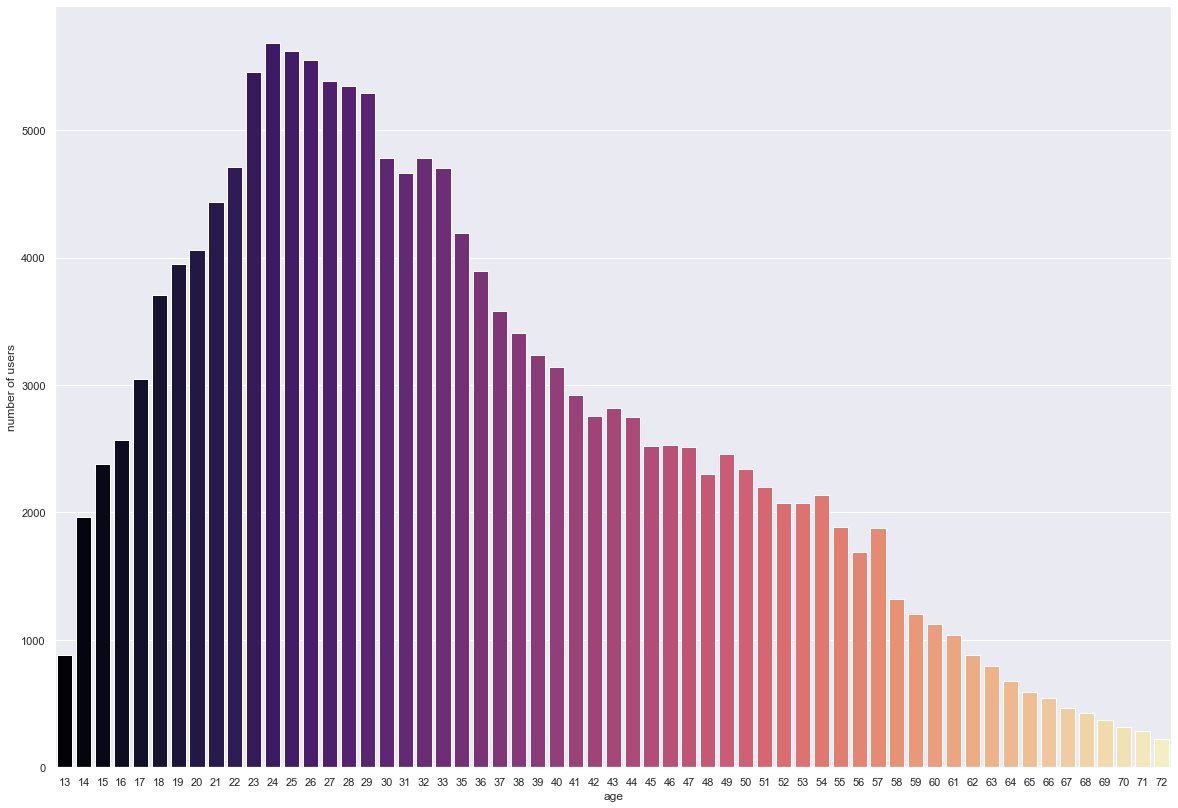

In [78]:
plt.subplots(figsize=(20,14))
sns.set_theme(style="darkgrid",context = 'notebook')
sns.barplot(x = users['age'].value_counts()[1:60].index,y = users['age'].value_counts()[1:60].values,
            palette = 'magma').set(xlabel = "age",ylabel = 'number of users')
plt.show()

#### The most number of users in our dataset are from the age group 20 years to 40years old.

### RATINGS

In [79]:
ratings

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [80]:
dict = {'User-ID': 'userID',
        'Book-Rating':'book_rating'}

ratings.rename(columns=dict,inplace=True)

In [81]:
ratings.head(1)

,userID,ISBN,book_rating
0,276725,034545104X,0


In [82]:
ratings['book_rating'].unique()

array([ 0,  5,  3,  6,  8,  7, 10,  9,  4,  1,  2], dtype=int64)

In [87]:
#keeping only the records of ratings for the books and users whose data is there in the respective users and books csv file
new_ratings = ratings[ratings['ISBN'].isin(books['ISBN'])]
new_ratings = new_ratings[new_ratings['userID'].isin(users['userID'])]

In [88]:
new_ratings.head()

,userID,ISBN,book_rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [89]:
new_ratings.head()

,userID,ISBN,book_rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [90]:
new_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016614 entries, 0 to 1149778
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   userID       1016614 non-null  int64 
 1   ISBN         1016614 non-null  object
 2   book_rating  1016614 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 31.0+ MB


In [91]:
#dropping the books whose ratings are zero
new_ratings = new_ratings.loc[new_ratings['book_rating'] != 0]

In [92]:
new_ratings['userID'].value_counts()[:10]

11676     6780
98391     5689
189835    1898
153662    1833
23902     1102
235105    1017
76499     1010
16795      956
171118     953
248718     935
Name: userID, dtype: int64

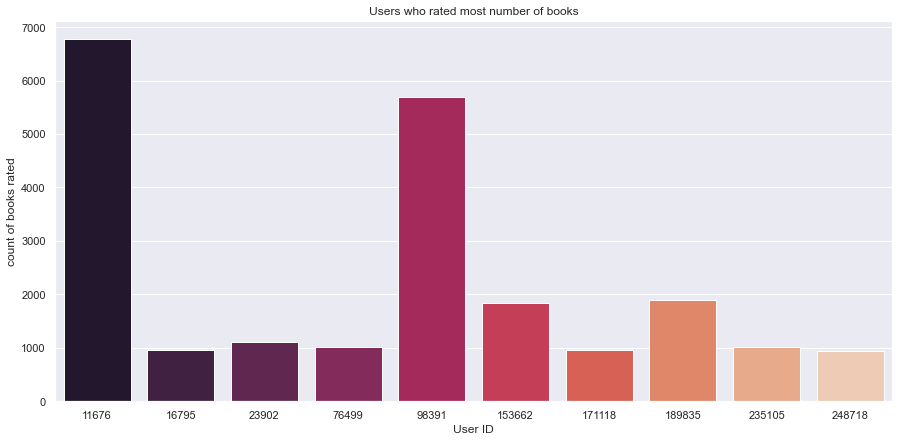

In [93]:
plt.subplots(figsize=(15,7))
sns.set_theme(style="darkgrid",context = 'notebook')
sns.barplot(x = new_ratings['userID'].value_counts()[0:10].index,y = new_ratings['userID'].value_counts()[0:10].values,
            palette = 'rocket').set(title="Users who rated most number of books",xlabel = "User ID",ylabel = 'count of books rated')
plt.show()

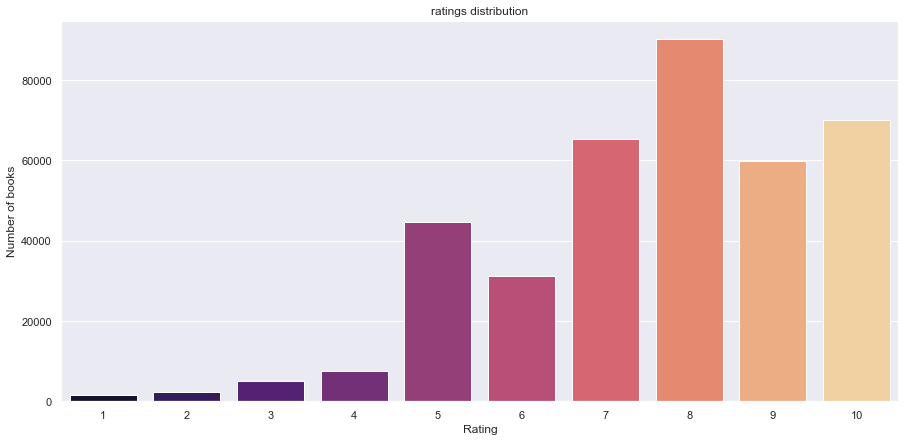

In [94]:
plt.subplots(figsize=(15,7))
sns.set_theme(style="darkgrid",context = 'notebook')
sns.barplot(x = new_ratings['book_rating'].value_counts().index,y = new_ratings['book_rating'].value_counts().values,
            palette = 'magma').set(title="ratings distribution",xlabel = "Rating",ylabel = 'Number of books')
plt.show()


### Merging of all three Tables
Merging Books, Users and Rating Tables in One

In [96]:
dataset = pd.merge(books, ratings, on='ISBN', how='inner')
dataset = pd.merge(dataset, users, on='userID', how='inner')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1029898 entries, 0 to 1029897
Data columns (total 9 columns):
 #   Column             Non-Null Count    Dtype 
---  ------             --------------    ----- 
 0   ISBN               1029898 non-null  object
 1   booktiltle         1029898 non-null  object
 2   bookauthor         1029898 non-null  object
 3   yearofpublication  1029898 non-null  int32 
 4   publisher          1029898 non-null  object
 5   userID             1029898 non-null  int64 
 6   book_rating        1029898 non-null  int64 
 7   Location           1029898 non-null  object
 8   age                1029898 non-null  int32 
dtypes: int32(2), int64(2), object(5)
memory usage: 70.7+ MB


### Divide complete data on the basis of Implicit and Explicit ratings datasets

In [98]:
## Explicit Ratings Dataset
dataset1 = dataset[dataset['book_rating'] != 0]
dataset1 = dataset1.reset_index(drop = True)
dataset1.shape

(383149, 9)

In [104]:
## Implicit Ratings Dataset
dataset2 = dataset[dataset['book_rating'] == 0]
dataset2 = dataset2.reset_index(drop = True)
dataset2.shape

(646749, 9)

In [105]:
dataset1.head()

,ISBN,booktiltle,bookauthor,yearofpublication,publisher,userID,book_rating,Location,age
0,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8,5,"timmins, ontario, canada",34
1,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002,Scribner,8,5,"timmins, ontario, canada",34
2,0887841740,The Middle Stories,Sheila Heti,2004,House of Anansi Press,8,5,"timmins, ontario, canada",34
3,1552041778,Jane Doe,R. J. Kaiser,1999,Mira Books,8,5,"timmins, ontario, canada",34
4,1567407781,The Witchfinder (Amos Walker Mystery Series),Loren D. Estleman,1998,Brilliance Audio - Trade,8,6,"timmins, ontario, canada",34


In [106]:
dataset2.head()

,ISBN,booktiltle,bookauthor,yearofpublication,publisher,userID,book_rating,Location,age
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,2,0,"stockton, california, usa",18
1,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,8,0,"timmins, ontario, canada",34
2,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,8,0,"timmins, ontario, canada",34
3,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,8,0,"timmins, ontario, canada",34
4,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,8,0,"timmins, ontario, canada",34
